# Chapter 2.7

Dang Thanh Vu - ID: 197796

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

def random_MixtureGaussian(N, P, m, S, cl):
    d = m.shape[1]
    c = m.shape[0]
    z = np.random.choice(np.arange(0,c), N, p=P)
    X = np.ones([1,d])
    for i in range(0,c):
        n = np.sum(z == np.array([i]*N))
        x = np.random.multivariate_normal(m[i], S[i], n)
        X = np.concatenate([X, x])
    X = X[1:]
    Y = cl*np.array(N*[1])
    return X, Y

def plot_decision(X_train, X, model):
    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Plot the decision boundary. For that, we will assign a color to each
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.plot(X[0][:,0], X[0][:,1], 'bo')
    plt.plot(X[1][:,0], X[1][:,1], 'r+')
    plt.show()
    

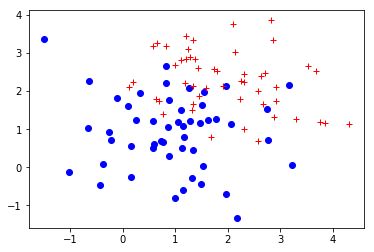

In [2]:
N = 50
P = np.array([1])
m1 = np.array([[1,1]])
S = np.array([np.identity(2)])
m2 = np.array([[2,2]])

X1, Y1 = random_MixtureGaussian(N, P, m1, S, 1)
X2, Y2 = random_MixtureGaussian(N, P, m2, S, -1)
X_train = np.concatenate([X1, X2])
Y_train = np.concatenate([Y1, Y2])
plt.plot(X1[:,0], X1[:,1], 'bo')
plt.plot(X2[:,0], X2[:,1], 'r+')
plt.show()

X1_test, Y1_test = random_MixtureGaussian(N, P, m1, S, 1)
X2_test, Y2_test = random_MixtureGaussian(N, P, m2, S, -1)
X_test = np.concatenate([X1_test, X2_test])
Y_test = np.concatenate([Y1_test, Y2_test])

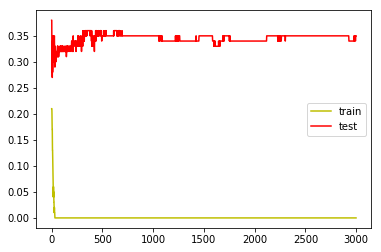

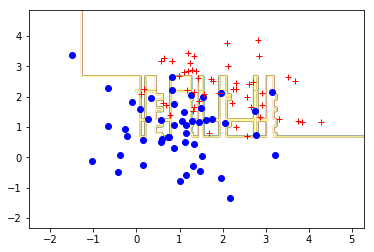

In [3]:
model1 = AdaBoostClassifier(n_estimators=3000)
model1.fit(X_train, Y_train)
ada_discrete_err = np.zeros((model1.n_estimators,))
for i, Y_predict in enumerate(model1.staged_predict(X_train)):
    ada_discrete_err[i] = 1 - np.sum(Y_predict==Y_train)/(2*N)
plt.plot(ada_discrete_err, 'y-', label="train")

ada_discrete_err = np.zeros((model1.n_estimators,))
for i, Y_predict in enumerate(model1.staged_predict(X_test)):
    ada_discrete_err[i] = 1 - np.sum(Y_predict==Y_test)/(2*N)
plt.plot(ada_discrete_err, 'r-', label="test")
plt.legend()
plt.show()
plot_decision(X_train, [X1, X2], model1)

s = 3

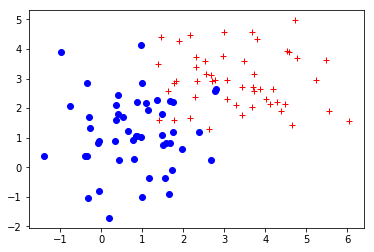

In [4]:
N = 50
P = np.array([1])
m1 = np.array([[1,1]])
S = np.array([np.identity(2)])
m2 = np.array([[3,3]])

X1, Y1 = random_MixtureGaussian(N, P, m1, S, 1)
X2, Y2 = random_MixtureGaussian(N, P, m2, S, -1)
X_train = np.concatenate([X1, X2])
Y_train = np.concatenate([Y1, Y2])
plt.plot(X1[:,0], X1[:,1], 'bo')
plt.plot(X2[:,0], X2[:,1], 'r+')
plt.show()

X1_test, Y1_test = random_MixtureGaussian(N, P, m1, S, 1)
X2_test, Y2_test = random_MixtureGaussian(N, P, m2, S, -1)
X_test = np.concatenate([X1_test, X2_test])
Y_test = np.concatenate([Y1_test, Y2_test])

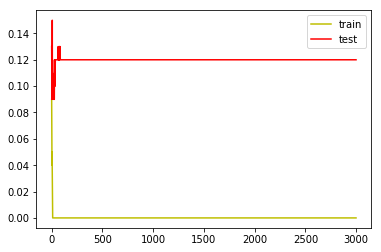

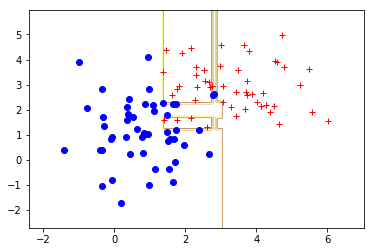

In [5]:
model2 = AdaBoostClassifier(n_estimators=3000)
model2.fit(X_train, Y_train)
ada_discrete_err = np.zeros((model2.n_estimators,))
for i, Y_predict in enumerate(model2.staged_predict(X_train)):
    ada_discrete_err[i] = 1 - np.sum(Y_predict==Y_train)/(2*N)
plt.plot(ada_discrete_err, 'y-', label="train")

ada_discrete_err = np.zeros((model2.n_estimators,))
for i, Y_predict in enumerate(model2.staged_predict(X_test)):
    ada_discrete_err[i] = 1 - np.sum(Y_predict==Y_test)/(2*N)
plt.plot(ada_discrete_err, 'r-', label="test")
plt.legend()
plt.show()
plot_decision(X_train, [X1, X2], model2)

s = 4

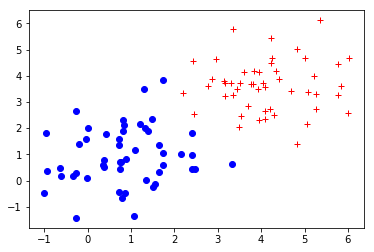

In [6]:
N = 50
P = np.array([1])
m1 = np.array([[1,1]])
S = np.array([np.identity(2)])
m2 = np.array([[4,4]])

X1, Y1 = random_MixtureGaussian(N, P, m1, S, 1)
X2, Y2 = random_MixtureGaussian(N, P, m2, S, -1)
X_train = np.concatenate([X1, X2])
Y_train = np.concatenate([Y1, Y2])
plt.plot(X1[:,0], X1[:,1], 'bo')
plt.plot(X2[:,0], X2[:,1], 'r+')
plt.show()

X1_test, Y1_test = random_MixtureGaussian(N, P, m1, S, 1)
X2_test, Y2_test = random_MixtureGaussian(N, P, m2, S, -1)
X_test = np.concatenate([X1_test, X2_test])
Y_test = np.concatenate([Y1_test, Y2_test])

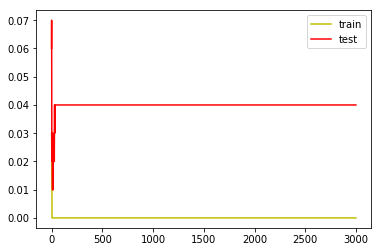

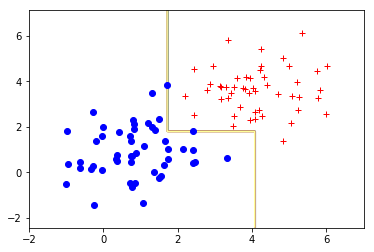

In [7]:
model3 = AdaBoostClassifier(n_estimators=3000)
model3.fit(X_train, Y_train)
ada_discrete_err = np.zeros((model3.n_estimators,))
for i, Y_predict in enumerate(model3.staged_predict(X_train)):
    ada_discrete_err[i] = 1 - np.sum(Y_predict==Y_train)/(2*N)
plt.plot(ada_discrete_err, 'y-', label="train")

ada_discrete_err = np.zeros((model3.n_estimators,))
for i, Y_predict in enumerate(model3.staged_predict(X_test)):
    ada_discrete_err[i] = 1 - np.sum(Y_predict==Y_test)/(2*N)
plt.plot(ada_discrete_err, 'r-', label="test")
plt.legend()
plt.show()
plot_decision(X_train, [X1, X2], model3)

s = 6

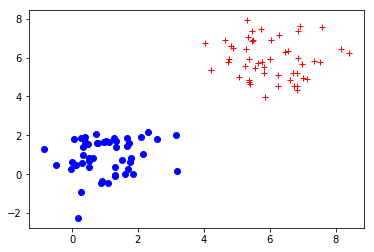

In [8]:
N = 50
P = np.array([1])
m1 = np.array([[1,1]])
S = np.array([np.identity(2)])
m2 = np.array([[6,6]])

X1, Y1 = random_MixtureGaussian(N, P, m1, S, 1)
X2, Y2 = random_MixtureGaussian(N, P, m2, S, -1)
X_train = np.concatenate([X1, X2])
Y_train = np.concatenate([Y1, Y2])
plt.plot(X1[:,0], X1[:,1], 'bo')
plt.plot(X2[:,0], X2[:,1], 'r+')
plt.show()

X1_test, Y1_test = random_MixtureGaussian(N, P, m1, S, 1)
X2_test, Y2_test = random_MixtureGaussian(N, P, m2, S, -1)
X_test = np.concatenate([X1_test, X2_test])
Y_test = np.concatenate([Y1_test, Y2_test])

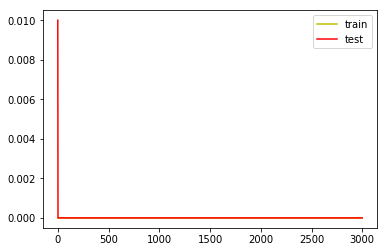

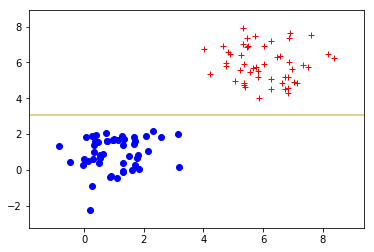

In [9]:
model4 = AdaBoostClassifier(n_estimators=3000)
model4.fit(X_train, Y_train)
ada_discrete_err = np.zeros((model4.n_estimators,))
for i, Y_predict in enumerate(model4.staged_predict(X_train)):
    ada_discrete_err[i] = 1 - np.sum(Y_predict==Y_train)/(2*N)
plt.plot(ada_discrete_err, 'y-', label="train")

ada_discrete_err = np.zeros((model4.n_estimators,))
for i, Y_predict in enumerate(model4.staged_predict(X_test)):
    ada_discrete_err[i] = 1 - np.sum(Y_predict==Y_test)/(2*N)
plt.plot(ada_discrete_err, 'r-', label="test")
plt.legend()
plt.show()
plot_decision(X_train, [X1, X2], model4)